# Discrete Sequences and Systems 

## Discrete sequences and their notation

Continuou sinewave with a peak amplitude of 1 at a frequency $f_0$ described by tge equation:
$$
x(t) = sin(2 \pi f_0t) \tag{1.1}
$$
The frequency $f_0$ is measured in hertz (Hz). 

If our continuous sinewave represents a physical voltage, we could sample it once every $t_s$ seconds using an analog-to-digital converter and represent the sinewave as a sequence of discrete values.
The independent variable $t$ in the continuous wave, Figure 1-1(a), is continuous. The independnt index variable n in Figure 1-1(b) is discrete and can have only integer values.

\begin{align*}
&x(0) = 0 \qquad &\text{($1^{st}$ sequence value, index n = 0)} \\
&x(1) = 0.31 \qquad &\text{($2^{nd}$ sequence value, index n = 1)} \\ 
&x(2) = 0.59 \qquad &\text{($3^{rd}$ sequence value, index n = 2)} \\
&x(3) = 0.81 \qquad &\text{($4^{th}$ sequence value, index n = 3)} \\
&... \tag{1.2}
\end{align*}

where $n$ represents the time index integer sequence 0, 1, 2, 3, etc. and $t_s$ is some constant time period.

Discrete-time expression:

$$
x(n) = sin(2 \pi f_0 n t_s) \tag{1.3}
$$

The $ 2 \pi f_0 n t_s$ is measured in radians. The variable $x(n)$ in Eq.(1-3) is read as "the sequence x of n".
Equantions (1.1) and (1.3) describe what are also referred to as time-domain signals because the independent variables, the continuous time t in Eq. (1.1), and the discrete-time $nt_s$ values used in Eq. (1-3) are measures of time.


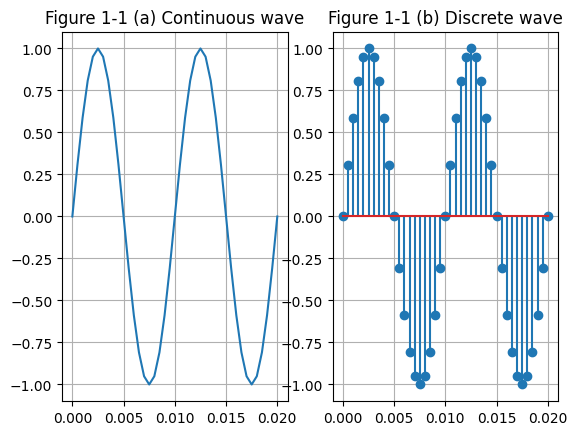

In [88]:
import numpy as np
import matplotlib.pyplot as plt

fs = 2e3
f0 = 100
t = np.arange(0,2*1/f0+1/fs, 1/fs)
x_cont = np.sin(2*np.pi*f0*t)

fig, (axs0, axs1) = plt.subplots(1, 2)
axs0.plot(t, x_cont)
axs0.set_title('Figure 1-1 (a) Continuous wave')
axs0.grid(True)
axs1.stem(t, x_cont)
axs1.set_title('Figure 1-1 (b) Discrete wave')
axs1.grid(True)

With this notion of a discrete-time signal in mind, let's say that a discrete system is a collection of hardware components, or software routines, that operate on a discrete-time signal sequence.

For example, a discrete system could be a process that gives us a discrete output sequence y(0), y(1), y(2), etc., when a discrete input sequence of x(0), x(1), x(2), etc. is applied to the system input.
$$
y(n) = 2x(n) - 1 \tag{1.4}
$$


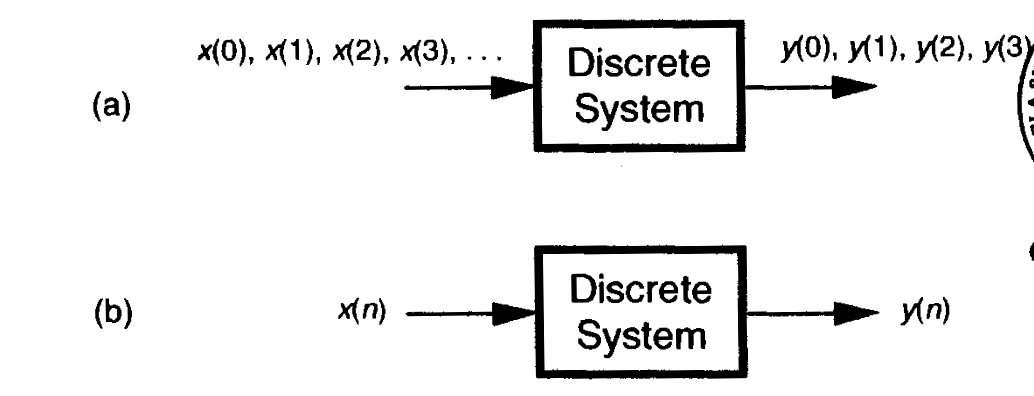

The fundamental difference between the way time is represented in continuous and discrete systems leads to a very important difference in how we characterize frequency in continuous and discrete systems.
Lets assume the Figure 1-1(a) - we could measure the frequency by applying it to an oscilloscope, a spectrum analyzer, or a frequency counter.
However, if we were merely given the list of values from Eq. (1-2) and asked to determine the frequency of the waveform they represent. We'd graph those discrete values, and, sure enough, we'd recogize a signle niewave as in Figure 1-1(b). We can say that  the sinewave repeats every 20 samples, ut ther's no way to determine the exact sinewave frequency from the discrete sequence values alone.
If we knew the time between samples - the sample period $t_s$ - we'd be able to determine the absolute frequency of the discrete sinewave.
Given that the $t_s$ sample period is, say, 0.05 milliseconds/sample, the period of the sinewave is 
$$
    \text{sinewave period} = \frac{\text{20 samples}}{\text{period}}.\frac{\text{0.05 milliseconds}}{\text{sample}} = \text{1 millisecond}
$$

Because the frequency of a sinewave is the reciprocal of its period, we now know that the sinewave's absolute frequency is $\frac{1}{\text{1ms}}$, or 1kHz. On the other hand, if we found that the sample period was, in fact, 2 milliseconds, the discrete samples in Figure 1-1(b) would represent a sinewave whose period is 40 milliseconds and whose frequency is 25Hz.

The point here is that, in discrete systems, absolute frequency determination in Hz is dependent on the sample frequency:
$$
f_s = \frac{1}{t_s} 
$$

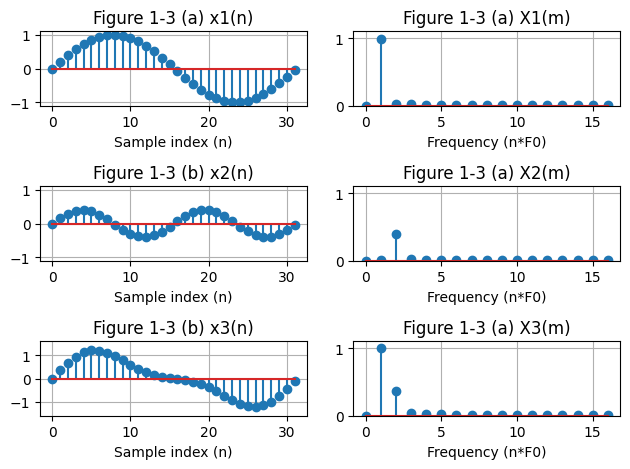

In [89]:
fs = 1e3
f1 = 32
f2 = 64
n = np.arange(0,32)
x1_disc = np.sin(2*np.pi*f1*n*1/fs)
x1_fft = np.abs(np.fft.rfft(x1_disc)/16)

x2_disc = 0.4*np.sin(2*np.pi*f2*n*1/fs)
x2_fft = np.abs(np.fft.rfft(x2_disc)/16)

x3_disc = x1_disc + x2_disc
x3_fft = np.abs(np.fft.rfft(x3_disc)/16)

fig, axs = plt.subplots(3, 2)
axs[0,0].stem(n, x1_disc)
axs[0,0].set_title('Figure 1-3 (a) x1(n)')
axs[0,0].set_xlabel('Sample index (n)')
axs[0,0].set_ylim(-1.1,1.1)
axs[0,0].grid(True)

axs[0,1].stem(x1_fft)
axs[0,1].set_title('Figure 1-3 (a) X1(m)')
axs[0,1].set_xlabel('Frequency (n*F0)')
axs[0,1].set_ylim(0,1.1)
axs[0,1].grid(True)

axs[1,0].stem(n, x2_disc)
axs[1,0].set_title('Figure 1-3 (b) x2(n)')
axs[1,0].set_xlabel('Sample index (n)')
axs[1,0].set_ylim(-1.1,1.1)
axs[1,0].grid(True)

axs[1,1].stem(x2_fft)
axs[1,1].set_title('Figure 1-3 (a) X2(m)')
axs[1,1].set_xlabel('Frequency (n*F0)')
axs[1,1].set_ylim(0,1.1)
axs[1,1].grid(True)

axs[2,0].stem(n, x3_disc)
axs[2,0].set_title('Figure 1-3 (b) x3(n)')
axs[2,0].set_xlabel('Sample index (n)')
axs[2,0].set_ylim(-1.6,1.6)
axs[2,0].grid(True)

axs[2,1].stem(x3_fft)
axs[2,1].set_title('Figure 1-3 (a) X3(m)')
axs[2,1].set_xlabel('Frequency (n*F0)')
axs[2,1].set_ylim(0,1.1)
axs[2,1].grid(True)

plt.tight_layout()

## Signal amplitude, magnitude, power

The amplitude of a variable is the measure of how far, and in what direction, that variable differs from zero. Thus, signal amplitudes can be either positive or negative.

The magnitude of a variable, on the other hand, is the measure of how far, regardless of direction, its quantify differs from zero. So magnitude are always positive values.
$$
\text{Magnitude samples} = | x_1(n) |
$$
Magnitude is also referred as the *absolute value*.

When we examine signals in the frequency domain, we'll often be interested in the power level of those signals. The power of a signal is proportional to its amplitude (or magnitude) squared.
$$
x_{pwr}(n) = x(n)^2 = | x(n)|^2 \tag{1.8}
$$
or
$$
X_{pwr}(m) = X(m)^2 = | X(m)|^2 \tag{1.8'}
$$




In [90]:
print(f"x1 magnitude = {np.round(np.abs(np.max(x1_disc)),2)}")
print(f"x1 power = {np.round(np.abs(np.max(x1_disc))**2,2)}")

print("---------------------------------------")
print(f"x2 magnitude = {np.round(np.abs(np.max(x2_disc)),2)}")
print(f"x2 power = {np.round(np.abs(np.max(x2_disc))**2,2)}")

print("---------------------------------------")
print(f"x2 to x1 magnitude relationship = {np.round(np.abs(np.max(x1_disc)),2)/np.round(np.abs(np.max(x2_disc)),2)}")
print(f"x2 to x1 power relationship = {np.round(np.abs(np.max(x1_disc))**2,2)/np.round(np.abs(np.max(x2_disc))**2,2)}")

print("---------------------------------------")
print(f"x2 to x1 magnitude relationship (dB)= {round(20*np.log10(np.round(np.abs(np.max(x1_disc)),2)/np.round(np.abs(np.max(x2_disc)),2)),2)}")
print(f"x2 to x1 power relationship (dB) = {round(10*np.log10(np.round(np.abs(np.max(x1_disc))**2,2)/np.round(np.abs(np.max(x2_disc))**2,2)),2)}")

x1 magnitude = 1.0
x1 power = 1.0
---------------------------------------
x2 magnitude = 0.4
x2 power = 0.16
---------------------------------------
x2 to x1 magnitude relationship = 2.5
x2 to x1 power relationship = 6.25
---------------------------------------
x2 to x1 magnitude relationship (dB)= 7.96
x2 to x1 power relationship (dB) = 7.96


## Signal processing operational symbols
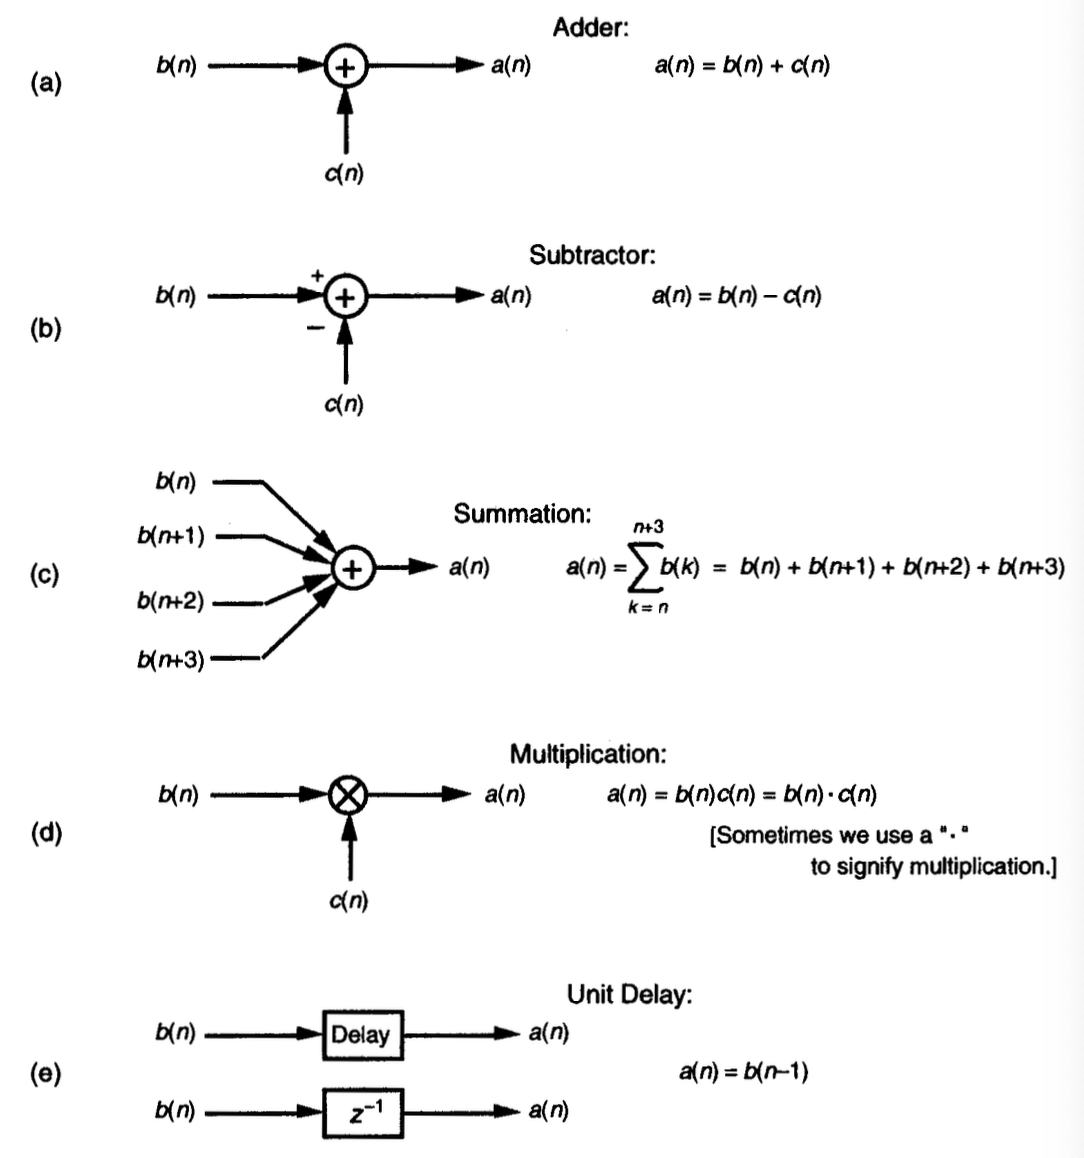

## Discrete Linear Systems

The term linear defines a special class of systems where the output is the superposition, or sum, of the individual outputs had the individual inputs been applied separately to the system.
We can say that the application of an input $x_1(n)$ to a system results in an output $y_1(n)$.

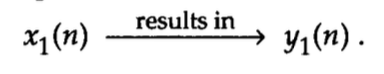

Given a different input $x_2(n)$, the system has a $y_2(n)$ output as

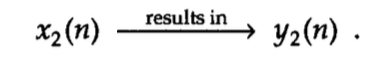

For the system to be linear, when its input is the sum $x_1(n) + x_2(n)$, its output must be the sum of the individual output so that

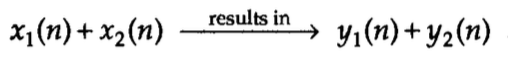

Also, part of this descritption of linearity is a proportionality characteristic. This means that if the inputs are scaled by constant factors $c_1$ and $c_2$ then the output sequence parts are also scaled by those factors as

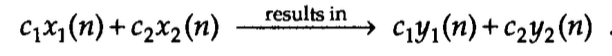

In the literature, this proportionality attribute of linear systems is sometimes called *homogeneity property*.

### Example of a Linear System

Let's say we have the discrete system whose output is defined as
$$
y(n) = \frac{-x(n)}{2}
$$
that is, the output sequence is equal to the negative of the input sequence with the amplitude reduced by a factor of two.

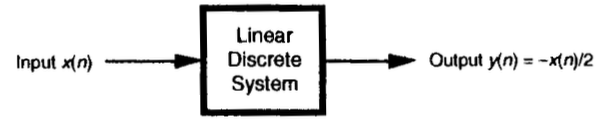

If we apply an $x_1(n)$ input sequence representing a 1Hz sinewave sampled at a rate of 32 samples per cycle, we'll have a $y_1(n)$ output as shown below:

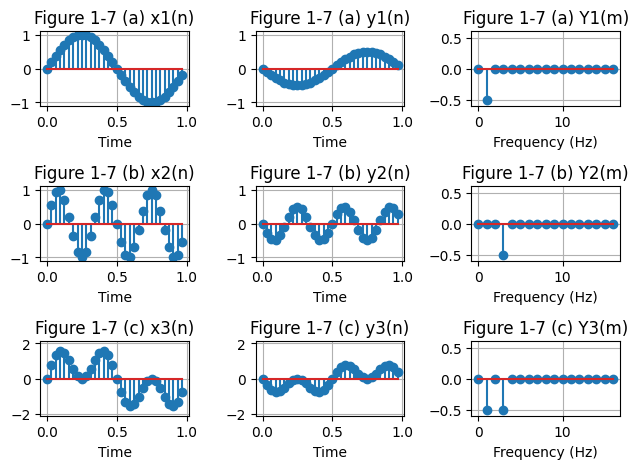

In [95]:
f0 = 1
N = 32
fs = N/f0
n = np.arange(0,N)
ts = n/fs

x1 = np.sin(2*np.pi*f0*ts)
y1 = -x1/2
Y1 = -np.abs(np.fft.rfft(y1))*2/N

x2 = np.sin(2*np.pi*3*f0*ts)
y2 = -x2/2
Y2 = -np.abs(np.fft.rfft(y2))*2/N

x3 = x1 + x2
y3 = -x3/2
Y3 = -np.abs(np.fft.rfft(y3))*2/N


fig, axs = plt.subplots(3, 3)
axs[0,0].stem(ts, x1)
axs[0,0].set_title('Figure 1-7 (a) x1(n)')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylim(-1.1,1.1)
axs[0,0].grid(True)

axs[0,1].stem(ts, y1)
axs[0,1].set_title('Figure 1-7 (a) y1(n)')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylim(-1.1,1.1)
axs[0,1].grid(True)

axs[0,2].stem(Y1)
axs[0,2].set_title('Figure 1-7 (a) Y1(m)')
axs[0,2].set_xlabel('Frequency (Hz)')
axs[0,2].set_ylim(-0.6,0.6)
axs[0,2].grid(True)

axs[1,0].stem(ts, x2)
axs[1,0].set_title('Figure 1-7 (b) x2(n)')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylim(-1.1,1.1)
axs[1,0].grid(True)

axs[1,1].stem(ts, y2)
axs[1,1].set_title('Figure 1-7 (b) y2(n)')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylim(-1.1,1.1)
axs[1,1].grid(True)

axs[1,2].stem(Y2)
axs[1,2].set_title('Figure 1-7 (b) Y2(m)')
axs[1,2].set_xlabel('Frequency (Hz)')
axs[1,2].set_ylim(-0.6,0.6)
axs[1,2].grid(True)

axs[2,0].stem(ts, x3)
axs[2,0].set_title('Figure 1-7 (c) x3(n)')
axs[2,0].set_xlabel('Time')
axs[2,0].set_ylim(-2.1,2.1)
axs[2,0].grid(True)

axs[2,1].stem(ts, y3)
axs[2,1].set_title('Figure 1-7 (c) y3(n)')
axs[2,1].set_xlabel('Time')
axs[2,1].set_ylim(-2.1,2.1)
axs[2,1].grid(True)

axs[2,2].stem(Y3)
axs[2,2].set_title('Figure 1-7 (c) Y3(m)')
axs[2,2].set_xlabel('Frequency (Hz)')
axs[2,2].set_ylim(-0.6,0.6)
axs[2,2].grid(True)

plt.tight_layout()

### Example of a Nonlinear System

It is easy to demonstrate how a nonlinear system yelds an output that is not equal to the sum of $y_1(n)$ and $y_2(n)$ when its input s $x_1(n)+x_2(n)$.
A simple example of a nonlinear discrete system is where the output is the square of the input described by
$$
y(n) = [x(n)]^2 \tag{1.16}
$$

We'll use a well known trigonometric identity and a little algebra to predict the output of this nonlinear system when the input comprises simple sinewaves.
Let's descrive a sinusoidal sequence, whose frequency $f_0 = 1Hz$ by
$$
x_1(n) = \sin(2 \pi f_0 n t_s) = \sin(2\pi \cdot 1 \cdot nt_s) \tag{1.17}
$$

Given this $x_1(n)$ input sequence, the $y_1(n)$ output of the nonlinear system is the square of a 1-Hz sinewave, or
$$
y_1(n) = [x_1(n)]^2 = \sin(2\pi\cdot 1\cdot nt_s) \cdot \sin(2\pi \cdot 1 \cdot nts) \tag{1.18}
$$

We can simplify our expression for $y_1(n)$ in Eq. (1.18) by using the following trigonometric identity:
$$
\sin(\alpha)\cdot\sin(\beta) = \frac{\cos(\alpha-\beta)}{2}-\frac{\cos(\alpha+\beta)}{2}\tag{1.19}
$$

Using Eq. (1.19), we can express $y_1(n)$ as
\begin{align*}
y_1(n) &= \frac{\cos(2\pi\cdot 1 \cdot nt_s - 2\pi\cdot 1 \cdot nt_s)}{2}- \frac{cos(2\pi\cdot 1 \cdot nt_s + 2\pi \cdot 1 \cdot nt_s)}{2} \\
&= \frac{\cos(0)}{2}-\frac{\cos(4\pi\cdot 1 \cdot nt_s)}{2}=\frac{1}{2}-\frac{\cos(2\pi \cdot 2 \cdot nt_s)}{2} \tag{1.20}
\end{align*}

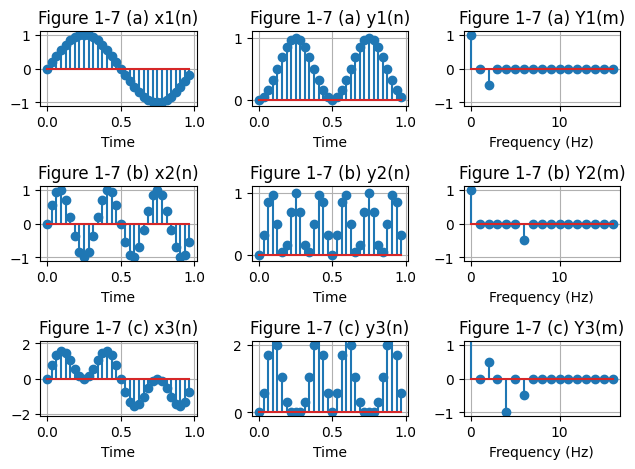

In [96]:
f0 = 1
N = 32
fs = N/f0
n = np.arange(0,N)
ts = n/fs

x1 = np.sin(2*np.pi*f0*ts)
y1 = x1**2
Y1 = (np.fft.rfft(y1))*2/N

x2 = np.sin(2*np.pi*3*f0*ts)
y2 = x2**2
Y2 = (np.fft.rfft(y2))*2/N

x3 = x1 + x2
y3 = x3**2
Y3 = (np.fft.rfft(y3))*2/N


fig, axs = plt.subplots(3, 3)
axs[0,0].stem(ts, x1)
axs[0,0].set_title('Figure 1-7 (a) x1(n)')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylim(-1.1,1.1)
axs[0,0].grid(True)

axs[0,1].stem(ts, y1)
axs[0,1].set_title('Figure 1-7 (a) y1(n)')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylim(-0.1,1.1)
axs[0,1].grid(True)

axs[0,2].stem(Y1)
axs[0,2].set_title('Figure 1-7 (a) Y1(m)')
axs[0,2].set_xlabel('Frequency (Hz)')
axs[0,2].set_ylim(-1.1,1.1)
axs[0,2].grid(True)

axs[1,0].stem(ts, x2)
axs[1,0].set_title('Figure 1-7 (b) x2(n)')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylim(-1.1,1.1)
axs[1,0].grid(True)

axs[1,1].stem(ts, y2)
axs[1,1].set_title('Figure 1-7 (b) y2(n)')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylim(-0.1,1.1)
axs[1,1].grid(True)

axs[1,2].stem(Y2)
axs[1,2].set_title('Figure 1-7 (b) Y2(m)')
axs[1,2].set_xlabel('Frequency (Hz)')
axs[1,2].set_ylim(-1.1,1.1)
axs[1,2].grid(True)

axs[2,0].stem(ts, x3)
axs[2,0].set_title('Figure 1-7 (c) x3(n)')
axs[2,0].set_xlabel('Time')
axs[2,0].set_ylim(-2.1,2.1)
axs[2,0].grid(True)

axs[2,1].stem(ts, y3)
axs[2,1].set_title('Figure 1-7 (c) y3(n)')
axs[2,1].set_xlabel('Time')
axs[2,1].set_ylim(-0.1,2.1)
axs[2,1].grid(True)

axs[2,2].stem(Y3)
axs[2,2].set_title('Figure 1-7 (c) Y3(m)')
axs[2,2].set_xlabel('Frequency (Hz)')
axs[2,2].set_ylim(-1.1,1.1)
axs[2,2].grid(True)

plt.tight_layout()

## Time-invariant systems

A time-invariant system is one where a time dela (or shift) in the input sequence causes a equivalent time delay in the system's output sequence.
Keeping in mind that n is just an indexing variable we use to keep track of our input and output samples, let's say a system provides an output $y(n)$ given an input $x(n)$, or

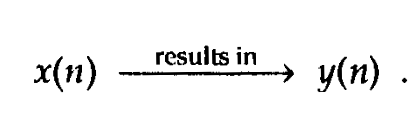

For a system to be time invariant, with a shifted version of the original $x(n)$ input applied, $x'(n)$, the following applies:

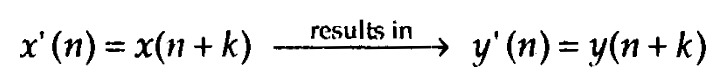

where $k$ is some integer representing $k$ sample period time delays. For a system to be time invariant, the expression above must hold true for any integer value of $k$ and any input sequence.

### Example of a Time-Invariant System

Assume that our initial $x(n)$ input is a unity-amplitude 1-Hz sinewave sequence with a $y(n)$ output. Consider a defferent input sequence $x'(n)$, where
$$
x'(n) = x(n+4)
$$

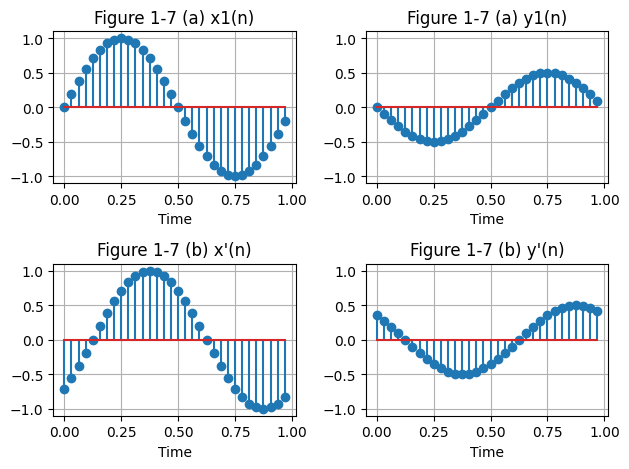

In [101]:
f0 = 1
N = 32
fs = N/f0
n = np.arange(0,N)
nl = np.arange(4,N+4)
ts = n/fs
tsl = nl/fs

x1 = np.sin(2*np.pi*f0*ts)
y1 = -x1/2
Y1 = (np.fft.rfft(y1))*2/N

x2 = np.sin(2*np.pi*f0*tsl)
y2 = -x2/2
Y2 = (np.fft.rfft(y2))*2/N


fig, axs = plt.subplots(2, 2)
axs[0,0].stem(ts, x1)
axs[0,0].set_title('Figure 1-7 (a) x1(n)')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylim(-1.1,1.1)
axs[0,0].grid(True)

axs[0,1].stem(ts, y1)
axs[0,1].set_title('Figure 1-7 (a) y1(n)')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylim(-1.1,1.1)
axs[0,1].grid(True)

axs[1,0].stem(ts, x2)
axs[1,0].set_title('Figure 1-7 (b) x\'(n)')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylim(-1.1,1.1)
axs[1,0].grid(True)

axs[1,1].stem(ts, y2)
axs[1,1].set_title('Figure 1-7 (b) y\'(n)')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylim(-1.1,1.1)
axs[1,1].grid(True)



plt.tight_layout()